In [61]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

from scipy.stats import chi2_contingency, randint

import os, sys
sys.path.append('../')

#plt.style.use('seaborn-muted')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import data and get columns from metadata
cols = pd.read_csv('../data/columns.csv', names=['labels'])
data = pd.read_csv('../data/census_income_learn.csv', names=cols['labels'].values).drop(columns=['instance_ignore'])

In [124]:
data

,age,class,industry_code_detailed,occupation_code_detailed,education,wage,enrolled_edu,marital_status,industry_code_major,occupation_code_major,...,country_father,country_mother,country_self,citizenship,own_business,fill_quest_va,veterans_benefits,weeks_worked_yr,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   age                          199523 non-null  int64 
 1   class                        199523 non-null  object
 2   industry_code_detailed       199523 non-null  int64 
 3   occupation_code_detailed     199523 non-null  int64 
 4   education                    199523 non-null  object
 5   wage                         199523 non-null  int64 
 6   enrolled_edu                 199523 non-null  object
 7   marital_status               199523 non-null  object
 8   industry_code_major          199523 non-null  object
 9   occupation_code_major        199523 non-null  object
 10  race                         199523 non-null  object
 11  hispanic                     199523 non-null  object
 12  sex                          199523 non-null  object
 13  union_mem     

In [5]:
data.describe()

,age,industry_code_detailed,occupation_code_detailed,wage,capital_gains,capital_losses,dividends,num_persons_worked_employer,own_business,veterans_benefits,weeks_worked_yr,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [6]:
data.drop_duplicates()

,age,class,industry_code_detailed,occupation_code_detailed,education,wage,enrolled_edu,marital_status,industry_code_major,occupation_code_major,...,country_father,country_mother,country_self,citizenship,own_business,fill_quest_va,veterans_benefits,weeks_worked_yr,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199517,39,Private,43,26,Bachelors degree(BA AB BS),0,Not in universe,Never married,Education,Adm support including clerical,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,2,Not in universe,2,52,95,- 50000.
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.


## Initial Observations
1. Instead of nulls/nans, there are a lot of 'Not in universe', which seems to indicate the data is missing. This is corroborated by the accompanying metadata.txt file that describes the data. I explore this a little more in the next couple cells. 
2. Most of the features are nominal/categorical variables, and a few have some level of redundancy (eg, household_descr vs household_summary). 
3. The metadata states that there are 46,716 duplicate or conflicting instances. Dropping duplicates resulted in 46,627 fewer observations. It is unclear whether these duplicates are due to data collecting/archiving errors or if they are representative of our data (and therefore we can assume that our data is iid). 

In [7]:
# Custom function to find out how many fields have 'Not in universe', which is equivalent to nan
def missing_pct(df):
    cols = df.columns
    pct_universe = []
    for col in cols:
        cts = df[col].apply(lambda x: 1 if 'Not in universe' in str(x) or '?' in str(x) else 0).sum()
        pct_universe.append(100*(cts)/df.shape[0])
    
    return pd.DataFrame({'Columns': cols, 'Percent': pct_universe})

In [8]:
# Some more information than what is in the summary or describe functions
pct_missing = missing_pct(data)
df_summary = pd.DataFrame({'dtypes': data.dtypes,
                           'total unique values': data.nunique(),
                           'percent missing': pct_missing['Percent'].values}).sort_values(by='percent missing',
                                                                                         ascending=False)
df_summary

,dtypes,total unique values,percent missing
fill_quest_va,object,3,99.005628
reason_unemploy,object,6,96.957744
enrolled_edu,object,3,93.694962
residence_state,object,51,92.449492
residence_region,object,6,92.094646
migration_sunbelt,object,4,92.094646
union_mem,object,3,90.445212
family_under18,object,5,72.288408
migration_msa,object,10,50.726984
migration_move_reg,object,10,50.726984


Several features have >90% of the data missing, which is a good reason to drop them from the data set prior to modeling. However, we want to look at each one of these and use our domain knowledge to decide if they are likely to have a large impact on the target variable. 

Other features, such as class or occupation code, are missing a lot of features, but are probably important for our model. We'll either impute values based on the distribution, or create another label indicating that there was no data. 

Text(0.5, 1.0, "Percent of values with 'Not in universe' or '?' for each feature")

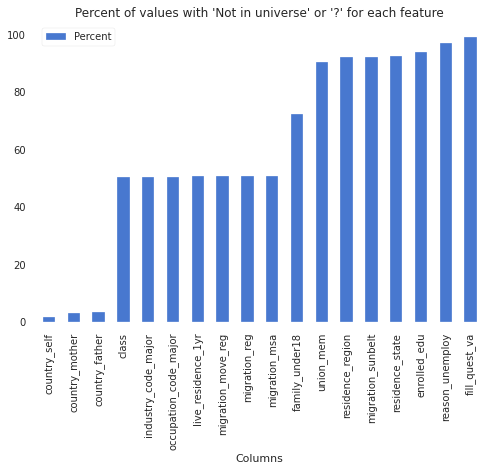

In [109]:
# Plot the missing values
pct_missing[pct_missing['Percent'] != 0].sort_values(by='Percent').plot('Columns', 'Percent', kind='bar')
plt.title('Percent of values with \'Not in universe\' or \'?\' for each feature')
plt.savefig('../images/missing_values.png', bbox_inches='tight', dpi=250)

## Visualizations

#### 1. Initial visualization reports using pandas profiling
Pandas profiling is an open source plotting package that displays both general statistics and basic histograms of all the features in a convenient html file. While it's also trivial to write a function that will generate similar statistics, using this package as a cursory first pass at the data saves time. I wasn't sure if this was considered a faux-pas, so I also went ahead and created similar histograms and count plots. 

#### 2. "Manual" visualizations using matplotlib and seaborn
Using matplotlib and seaborn, I created some raw visuals for most of the features. Those that had >90% of the data missing were typically left out.
Additionally, some more relevant visualizations were created showing:
- The distribution of income across demographic features (education, class, marital status)
- The distribution of different occupations and employment (also split by income)

In [264]:
# Pandas profiling, use minimal=True for large dataset
profile = ProfileReport(data, title='Census Profile Report', minimal=True)
profile.to_file('../reports/census_profiling.html')

### Overall View of Data
First, let's look at what we are working with, starting with income. An unbiased dataset is going to take some special treatment when doing modeling, particularly when it comes to deciding best metrics to use to analyze our model. 

Text(0, 0.5, 'Percentage')

0.938 of the data has income =  - 50000., and 0.062 has income =  50000+.


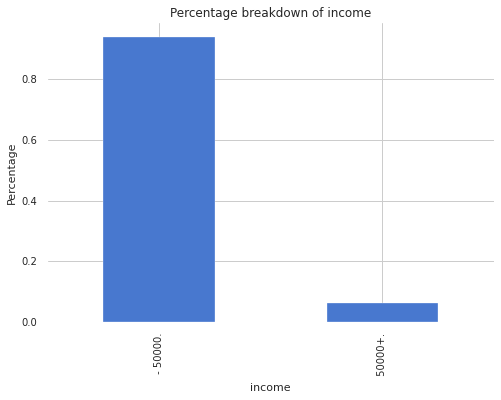

In [108]:
# What is our breakdown of income?
income = (data.groupby(by='income').count()/data.shape[0]).iloc[:,0]
income.plot(kind='bar', title='Percentage breakdown of income', grid=True)
plt.ylabel('Percentage')
plt.savefig('../images/income.png', bbox_inches='tight', dpi=250)
print('{:2.3f} of the data has income = {}, and {:2.3f} has income = {}'.format(income[0], income.index[0], income[1], income.index[1]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b26c2ac50>,
      dtype=object)

Text(0.5, 0.98, 'Histograms of Numerical Features')

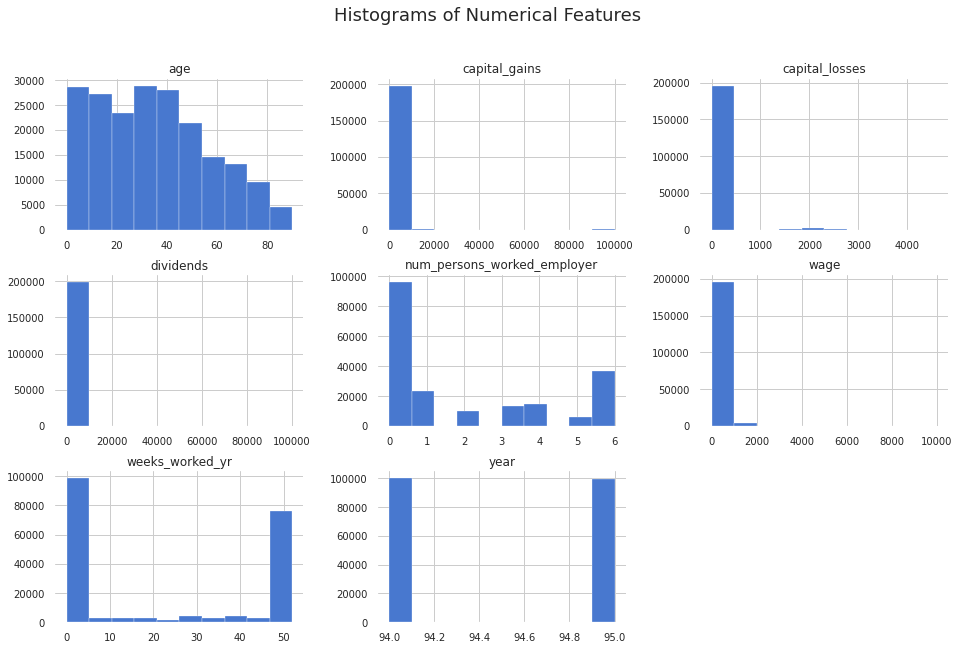

In [117]:
# Separate out numerical and categorical features
numerical = data.select_dtypes(np.number).columns.tolist()
categorical = data.select_dtypes(exclude=np.number).columns.tolist()

# Plot numerical data using built-in plotting
(
    data[numerical].drop(columns=['industry_code_detailed', 'occupation_code_detailed',
                       'own_business', 'veterans_benefits'])
                    .hist(figsize=(16, 10), layout=(3,3))
)
plt.suptitle('Histograms of Numerical Features', fontsize=18)
plt.savefig('../images/hist_num.png', dpi=250)

Text(0, 0.5, 'Count')

Text(0.5, 0.98, 'Income distribution by Feature and Label')

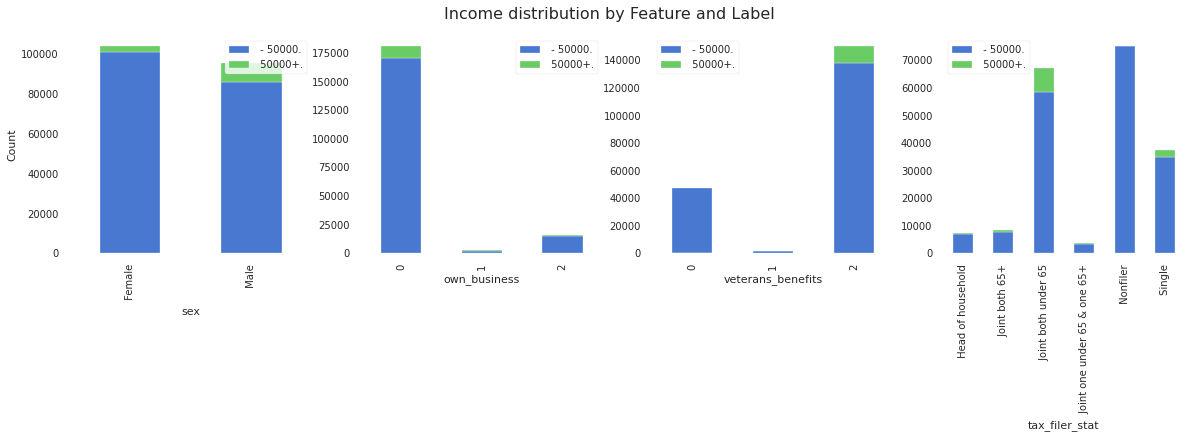

In [125]:
fig, axes = plt.subplots(1,4, figsize=(20,4))
for ax, label in zip(axes.flatten(), ['sex', 'own_business', 'veterans_benefits', 'tax_filer_stat']):   

    data.groupby(by=[label, 'income']).size().reset_index().pivot(columns='income', index=label, values=0).plot.bar(stacked=True, ax=ax)
    ax.legend(loc='top')
axes[0].set_ylabel('Count')
plt.suptitle('Income distribution by Feature and Label', fontsize=16)
plt.savefig('../images/hist_incomedistr.png', bbox_inches='tight', dpi=250)

Text(0, 0.5, 'Percentage')

Text(0.5, 0.98, 'Income distribution by Education, Class, and Marital Status')

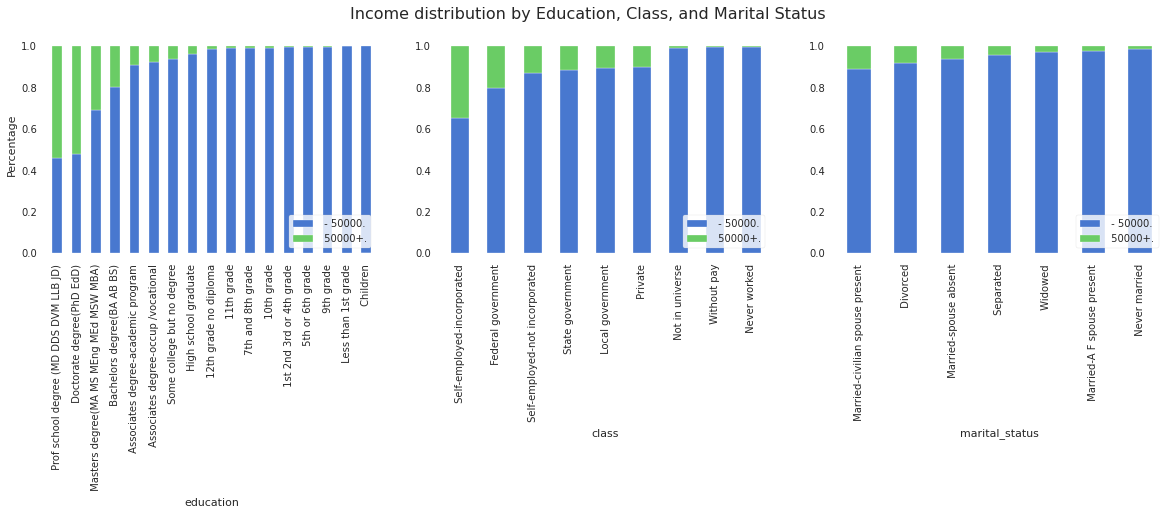

In [126]:
# Percent of each industry/occupation that makes either > 50k or < 50k
fig, axes = plt.subplots(1,3, figsize=(20,4))
cats = ['education', 'class', 'marital_status']
for cat, ax in zip(cats, axes.flatten()):
    df = (
        data.groupby(by=['income', cat])
        .size()
        .reset_index()
        .pivot(columns=cat, index='income', values=0)
    )
    df.apply(lambda x: x/x.sum(axis=0)).transpose().sort_values(by=' 50000+.', ascending=False).plot.bar(stacked=True, ax=ax)
    ax.legend(loc='lower right')
axes[0].set_ylabel('Percentage')
plt.suptitle('Income distribution by Education, Class, and Marital Status', fontsize=16)
plt.savefig('../images/hist_incomedistr2.png', bbox_inches='tight', dpi=250)

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

Text(0.5, 0.98, 'Marital Status, Employment Status, and Race: Counts and Age Distribution')

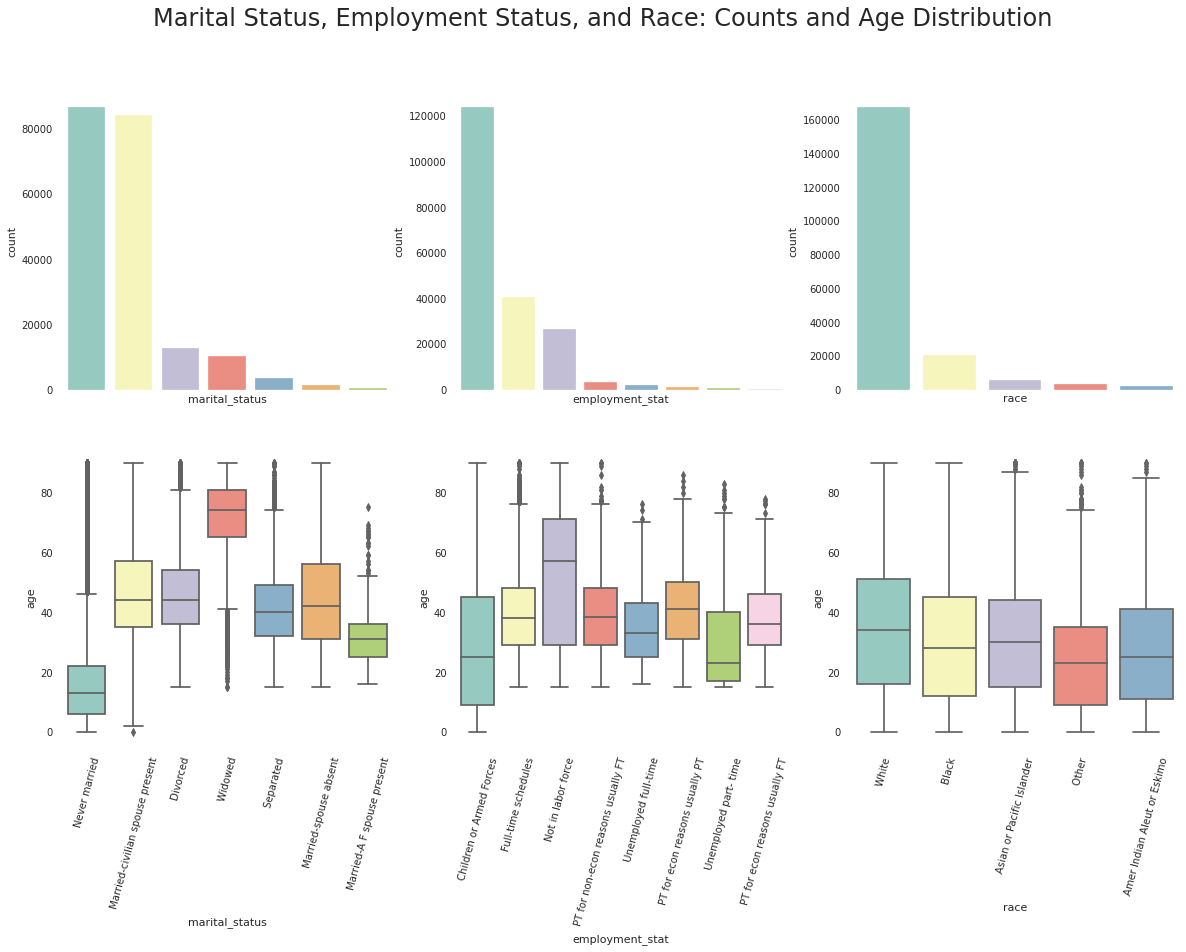

In [102]:
# Lets look at some of the more common demographic information
fig, axes = plt.subplots(2,3, figsize=(20,12))
cats = ['marital_status', 'employment_stat', 'race']
for cat, ax in zip(cats, axes.flatten()):
    sns.countplot(x=cat, data=data, ax=ax, palette='Set3', order=data[cat].value_counts().index)
    [label.set_visible(False) for label in ax.get_xticklabels()]
for cat, ax in zip(cats, axes.flatten()[3:]):
    sns.boxplot(x=cat, y='age', data=data, palette='Set3', ax=ax, order=data[cat].value_counts().index)
    [label.set_rotation(75) for label in ax.get_xticklabels()]
plt.suptitle('Marital Status, Employment Status, and Race: Counts and Age Distribution', fontsize=24)
plt.savefig('../images/hist_box.png', bbox_inches='tight', dpi=250)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

Text(0.5, 0.98, 'Education and Class')

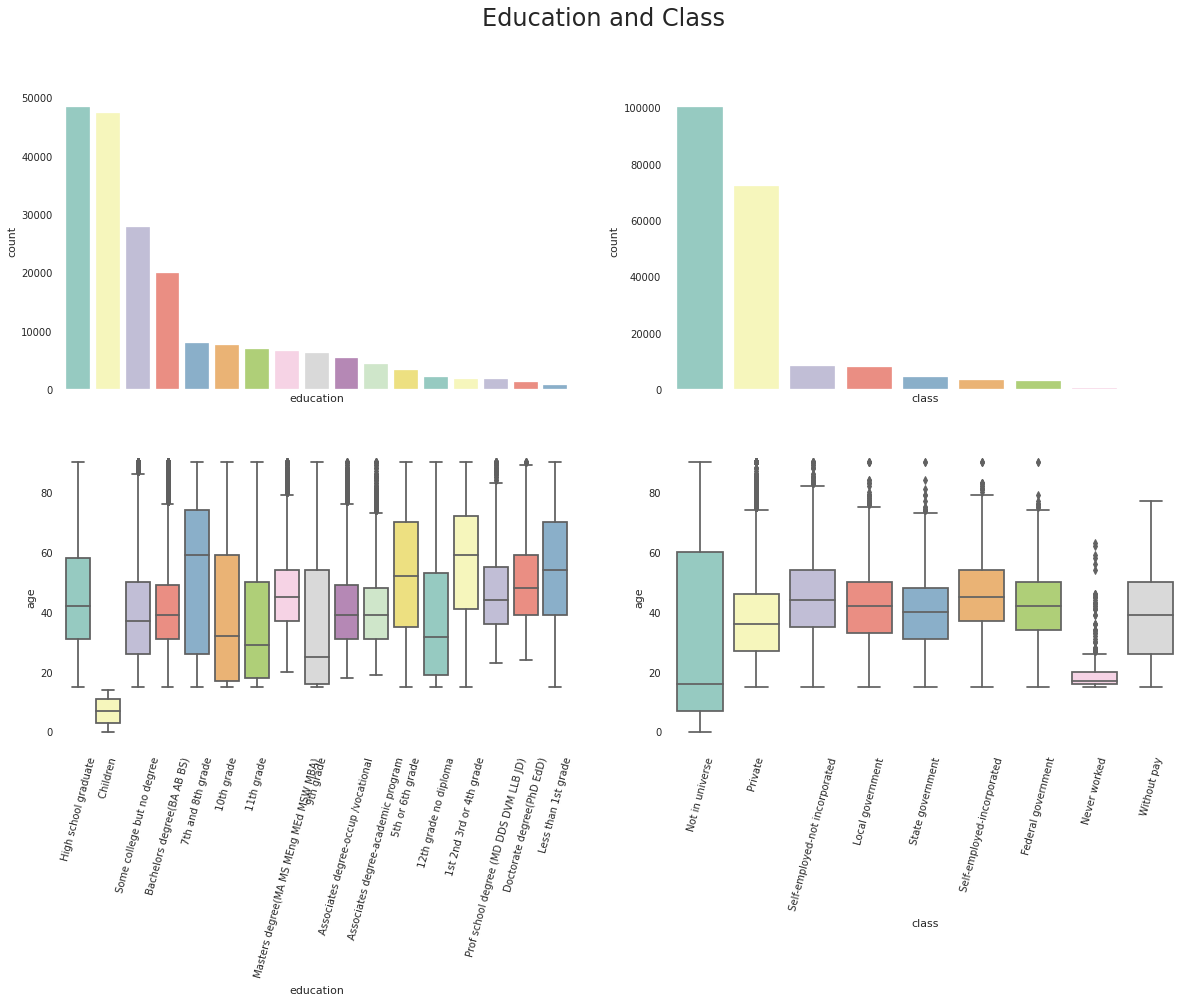

In [103]:
# Lets look at some of the more common demographic information
fig, axes = plt.subplots(2,2, figsize=(20,12))
cats = ['education', 'class']
for cat, ax in zip(cats, axes.flatten()):
    sns.countplot(x=cat, data=data, ax=ax, palette='Set3', order=data[cat].value_counts().index)
    [label.set_visible(False) for label in ax.get_xticklabels()]
for cat, ax in zip(cats, axes.flatten()[2:]):
    sns.boxplot(x=cat, y='age', data=data, palette='Set3', ax=ax, order=data[cat].value_counts().index)
    [label.set_rotation(75) for label in ax.get_xticklabels()]
plt.suptitle('Education and Class', fontsize=24)
plt.savefig('../images/hist_box2.png', bbox_inches='tight', dpi=250)

[None, None, None, None, None]

[None, None, None, None, None, None, None, None]

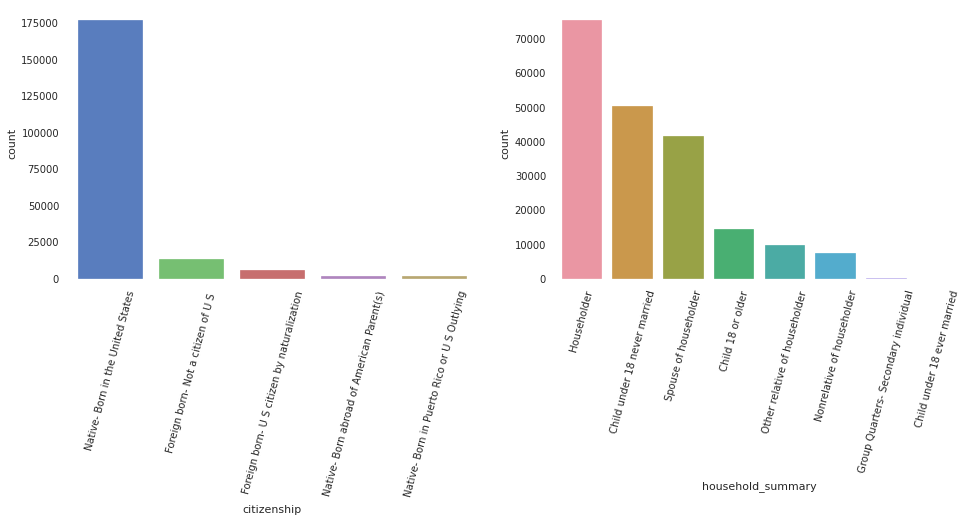

In [52]:
# Other features
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.countplot(data['citizenship'], ax=axes[0])
[label.set_rotation(75) for label in axes[0].get_xticklabels()]
sns.countplot(data['household_summary'], ax=axes[1], order=data['household_summary'].value_counts().index)
[label.set_rotation(75) for label in axes[1].get_xticklabels()]

An interesting point from the education feature is that there is a high count for the 'Children' label. We could make an assumption that this refers to a child and not a level of education, but best practices would be to check the census website for more detail on the meaning of this particular label. 

''

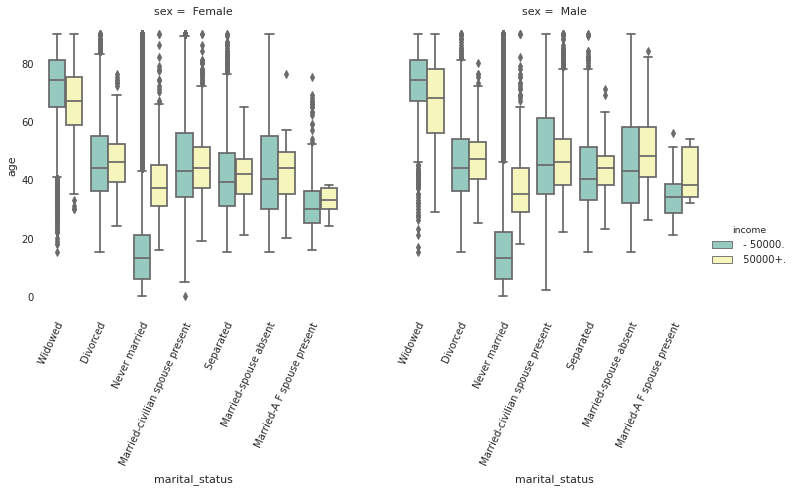

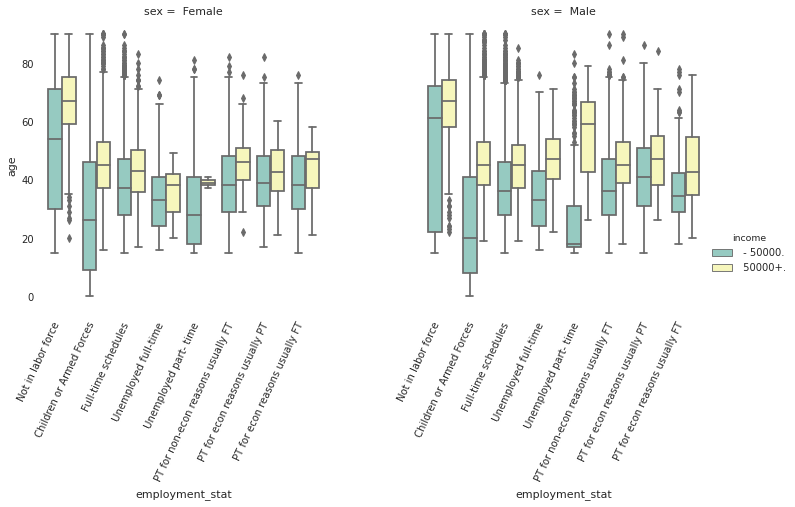

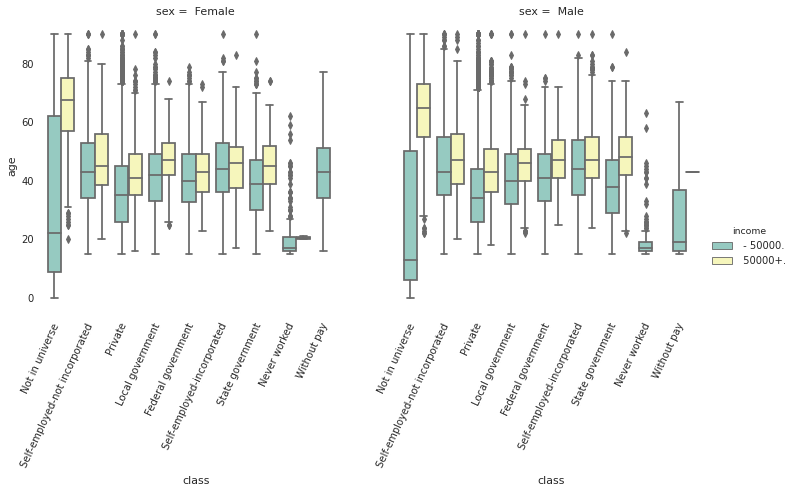

In [60]:
# Lets look at several interesting features, separated by income
for cat in ['marital_status', 'employment_stat', 'class']:
    plot = sns.catplot(x=cat, y='age', col='sex', hue='income', 
                   data=data, kind='box', palette="Set3")
    plot.set_xticklabels(rotation=65, horizontalalignment='right')
;

''

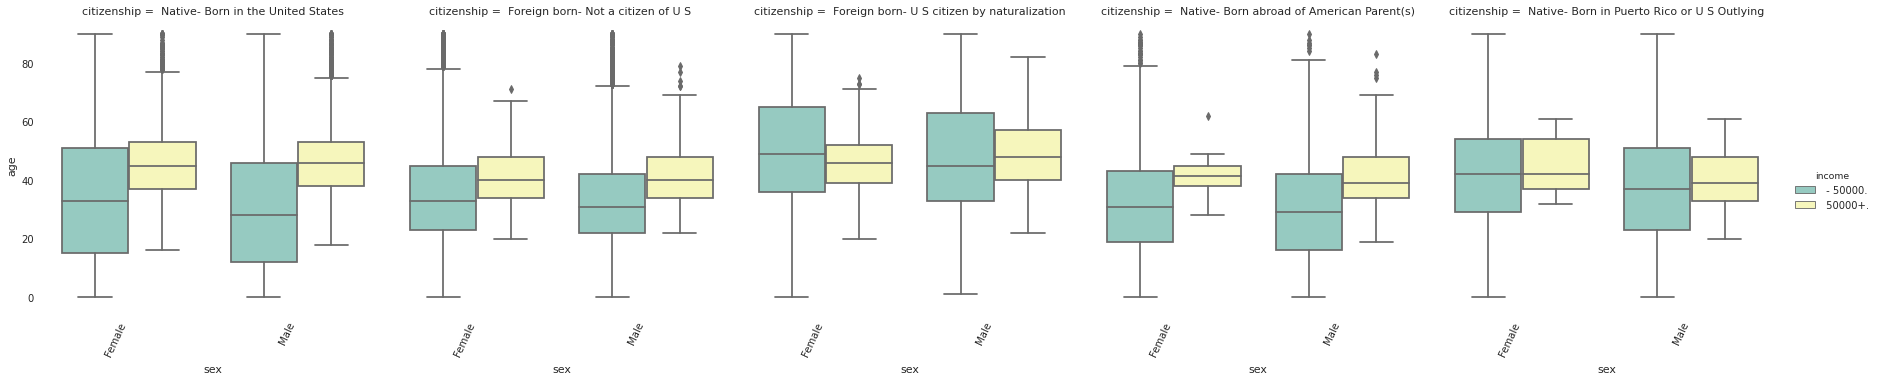

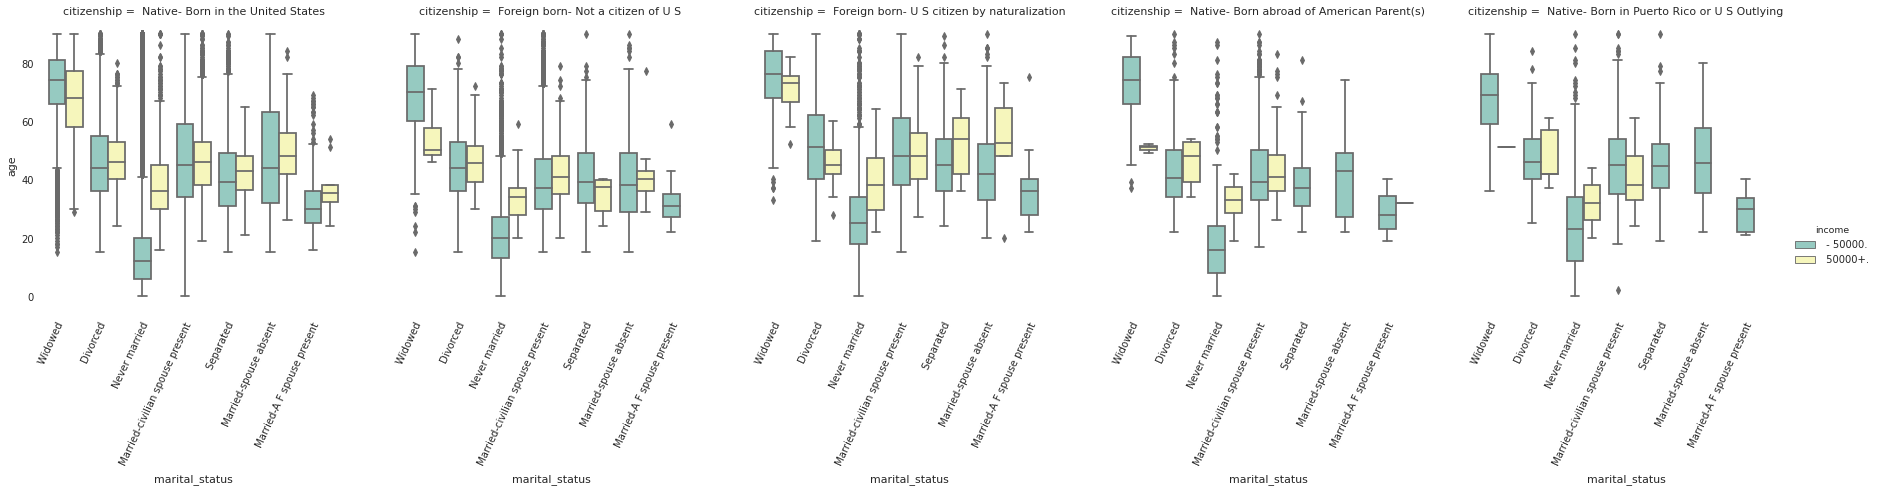

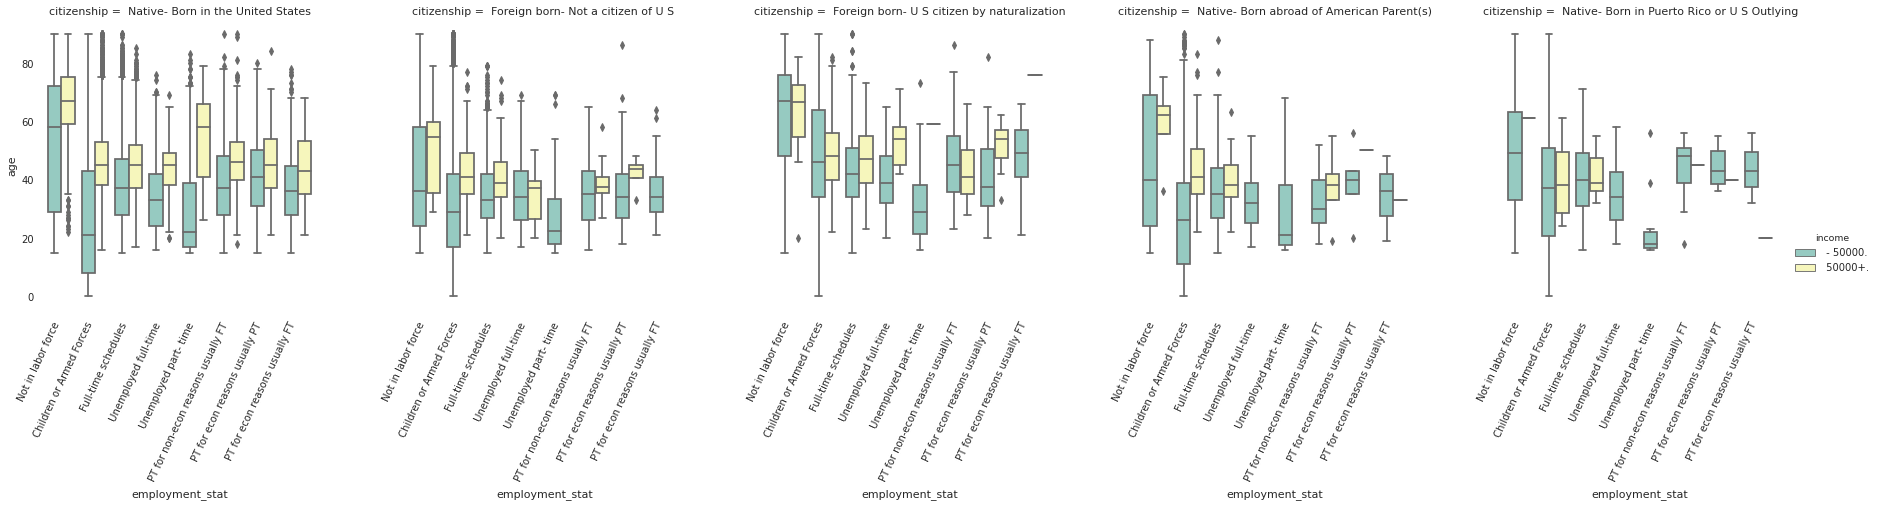

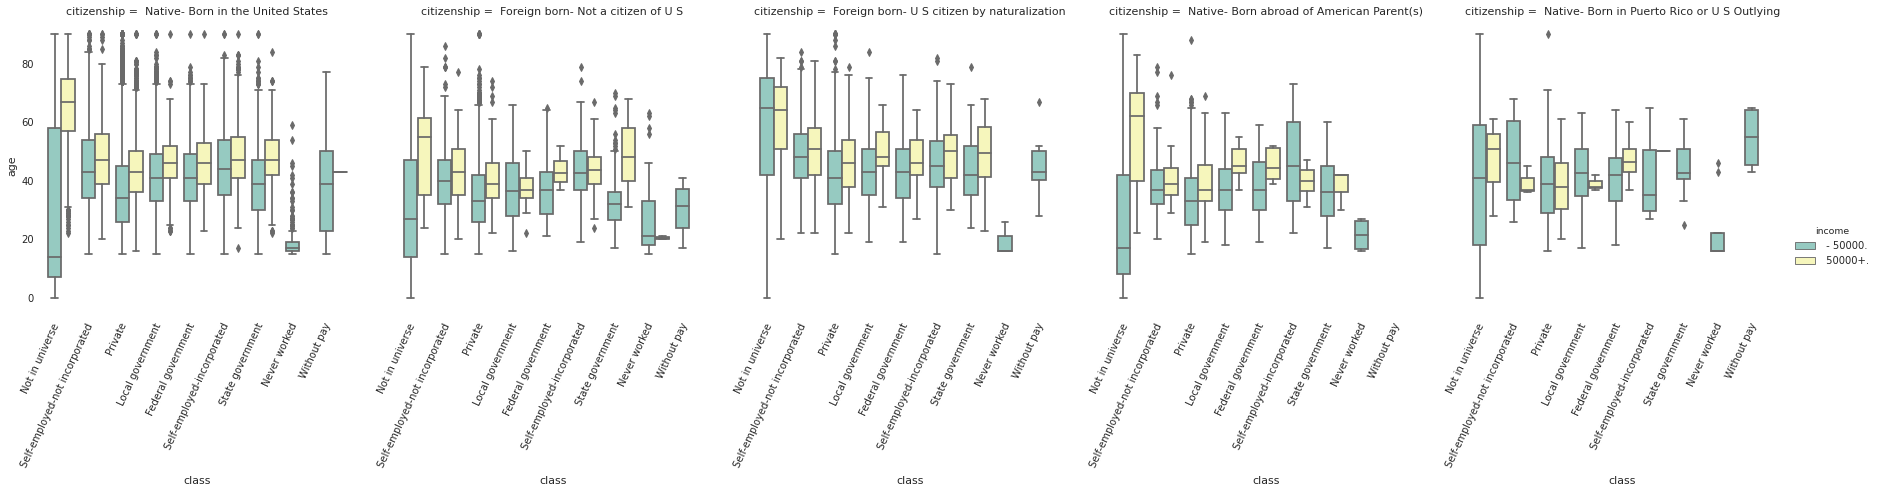

In [94]:
# Lets look at several interesting features, separated by income
for cat in ['sex', 'marital_status', 'employment_stat', 'class']:
    plot = sns.catplot(x=cat, y='age', col='citizenship', hue='income', 
                   data=data, kind='box', palette="Set3")
    plot.set_xticklabels(rotation=65, horizontalalignment='right')
;

### 

## Correlations

### Check for correlations
*Nice to know, but only really pertinent for models with independence assumption between features (LR and NaiveBayes)*
1. data.corr() for numerical columns (using Pearson's)
2. Chi-squared test for categorical columns

In [ ]:
# Simple Pearson's correlation 
sns.heatmap(data.corr())

In [ ]:
# Chi-squared test between categorical variables; gives p, dof, where dof = (rows-1)*(cols-1)
table = pd.crosstab(index=data['income'], columns=data['industry_code_detailed'])
stat, p, dof, expected = chi2_contingency(table.values)
stat, p, dof